In [1]:
#Import required liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Load CSV
lead_df=pd.read_csv("Leads.csv")

In [4]:
#Read CSV
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
#check the shape of df
lead_df.shape

(9240, 37)

In [6]:
#statistical description
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
#checking info of every column
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### DATA clean

In [8]:
#Drop the Prospect ID column as it has all unique values
lead_df.drop(["Prospect ID",'Lead Number'],axis=1,inplace=True)

In [9]:
#Many colums has value "Select" that we have to replace with Nan values
lead_df=lead_df.replace("Select",np.nan)

In [10]:
#checkinh dataset again
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [11]:
#checking the missing value in columns
lead_df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [12]:
#Percenatge missing values
round(100*(lead_df.isnull().sum()/len(lead_df)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [13]:
#dropping the column with more than 40% missing vaues
lead_df=lead_df.loc[:,(lead_df.isnull().sum()/len(lead_df))<=0.4]

In [14]:
#Checking shape again after dropping columns
lead_df.shape

(9240, 28)

In [15]:
#checking null values again
round(100*(lead_df.isnull().sum()/len(lead_df)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [16]:
#checking column for Lead Source
lead_df["Lead Source"].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [17]:
#as count of Google is more we will replace Nan with Google
lead_df["Lead Source"]=lead_df["Lead Source"].replace(np.nan,"Google")
#Also there is another spelling of Google which is google so we will replace google with Google
lead_df["Lead Source"]=lead_df["Lead Source"].replace('google',"Google")

In [18]:
#Combining the columns with less counts
lead_df["Lead Source"]=lead_df["Lead Source"].replace(['bing','Click2call','Press_Release','Social Media',
                                                       'Live Chat','youtubechannel','testone','Pay per Click Ads',
                                                       'welearnblog_Home','WeLearn','blog','NC_EDM'],"Others")

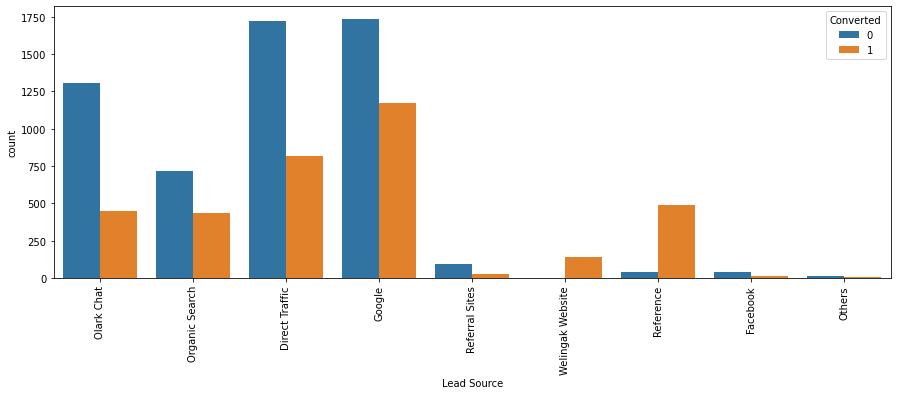

In [19]:
#checking the effect of Lead Source on converted
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Lead Source', hue='Converted' , data =lead_df)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#Lead generation from Direct Traffic and Google is more
#Conversion rates from Reference and Wellingak Website is more

In [20]:
#checking Lead origin 
lead_df["Lead Origin"].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

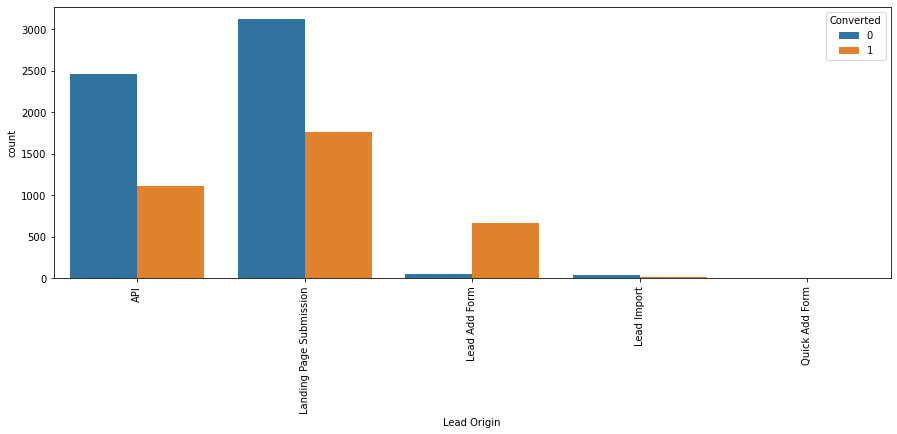

In [21]:
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Lead Origin', hue='Converted' , data =lead_df)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#API and Landing Page Submission has more lead origins
#Leads converted more from Lead Add Form

In [22]:
#Checking Do Not Email
lead_df["Do Not Email"].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

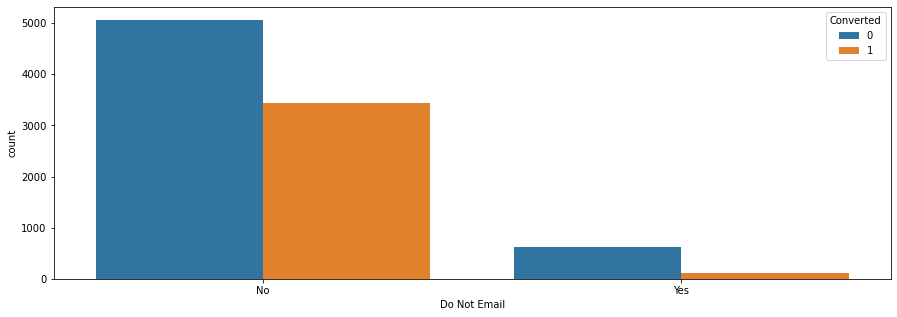

In [23]:
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Do Not Email', hue='Converted' , data =lead_df)
s1.set_xticklabels(s1.get_xticklabels())
plt.show()

#Email has higher count for creating leads and conversion also

In [24]:
#Checking Do Not Call
lead_df["Do Not Call"].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

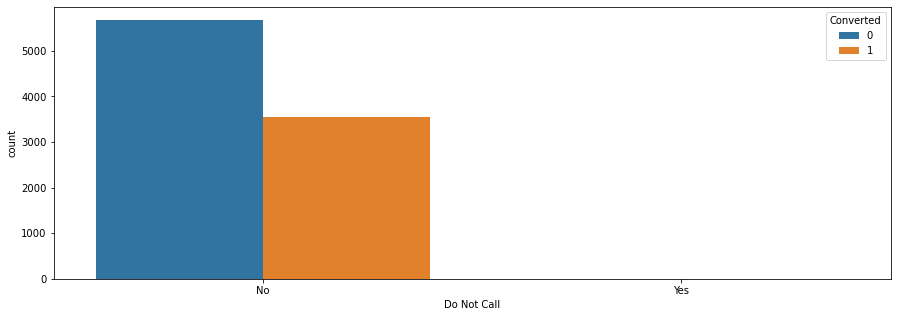

In [25]:
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Do Not Call', hue='Converted' , data =lead_df)
s1.set_xticklabels(s1.get_xticklabels())
plt.show()

#Do Not Call data is highly skewed so need to drop column

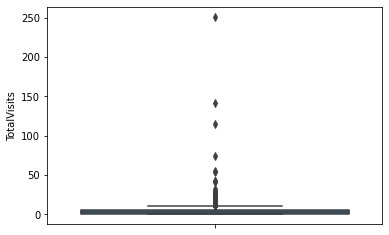

In [26]:
sns.boxplot(y=lead_df['TotalVisits'])
plt.show()

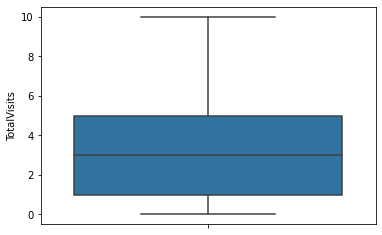

In [27]:
#Outlier Treatment: capping the outliers to 95% value for analysis

percentiles = lead_df['TotalVisits'].quantile([0.05,0.95]).values
lead_df['TotalVisits'][lead_df['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead_df['TotalVisits'][lead_df['TotalVisits'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=lead_df['TotalVisits'])
plt.show()

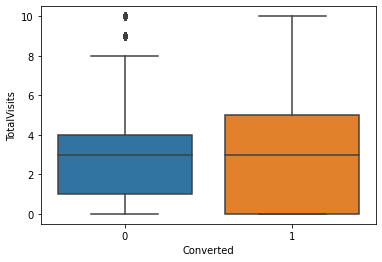

In [28]:
#checking with Converted column
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_df)
plt.show()

#As median is same nothing conclusive can make from TotalVisits column

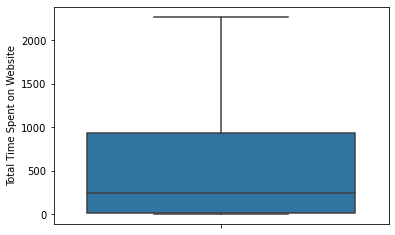

In [29]:
# checking Total Time Spent on Website column
sns.boxplot(y = lead_df['Total Time Spent on Website'])
plt.show()

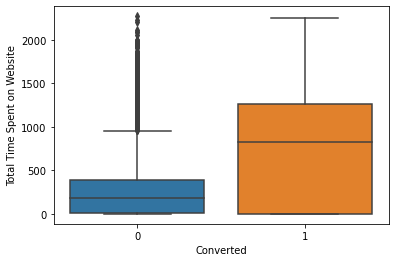

In [30]:
#checking with Converted column
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_df)
plt.show()

#who spent more time on website are likely to convert so website interface is more user freindly and informative

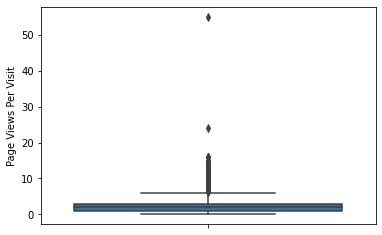

In [31]:
#Checking Page Views Per Visit
sns.boxplot(y = lead_df['Page Views Per Visit'])
plt.show()

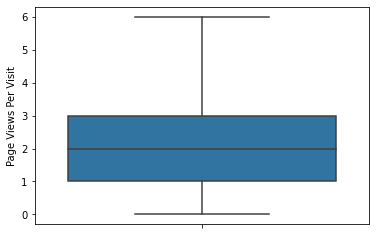

In [32]:

#Outlier Treatment: capping the outliers to 95% value for analysis

percentiles = lead_df['Page Views Per Visit'].quantile([0.05,0.95]).values
lead_df['Page Views Per Visit'][lead_df['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
lead_df['Page Views Per Visit'][lead_df['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=lead_df['Page Views Per Visit'])
plt.show()

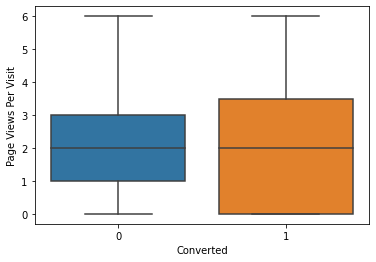

In [33]:
#Checking with 
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lead_df)
plt.show()

#Median for converted and non converted is same so Page Views Per Visit column is non conclusive


In [34]:
#Checking Last Activity
lead_df['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [35]:
#Replace Nan values with email opened as it has highest value
lead_df["Last Activity"]=lead_df["Last Activity"].replace(np.nan,'Email Opened ')

In [36]:
#Combine the columns with less values together in 'Other' column
lead_df["Last Activity"]=lead_df["Last Activity"].replace(['Unreachable','Unsubscribed','Had a Phone Conversation',
                                                          'Approached upfront','View in browser link Clicked','Email Received',
                                                          'Email Marked Spam','Visited Booth in Tradeshow','Resubscribed to emails'],'Others')

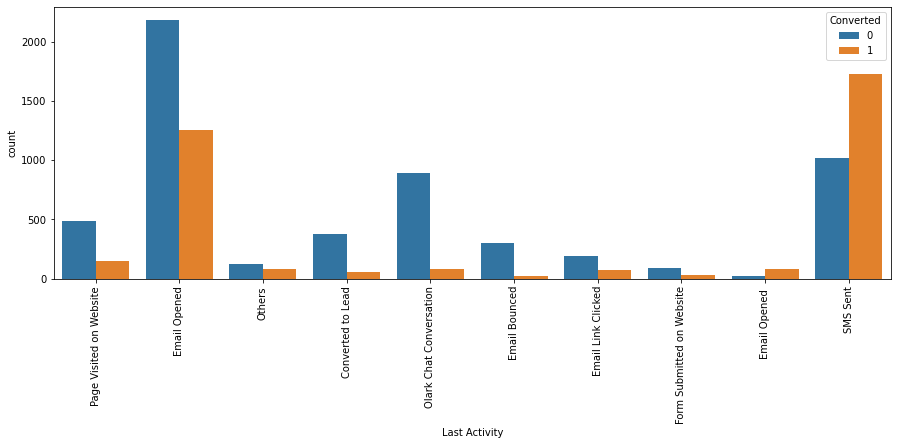

In [37]:
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Last Activity', hue='Converted' , data =lead_df)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#Email opened has highest leads but conversion is more in SMS Sent

In [38]:
#Checking Country
lead_df['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

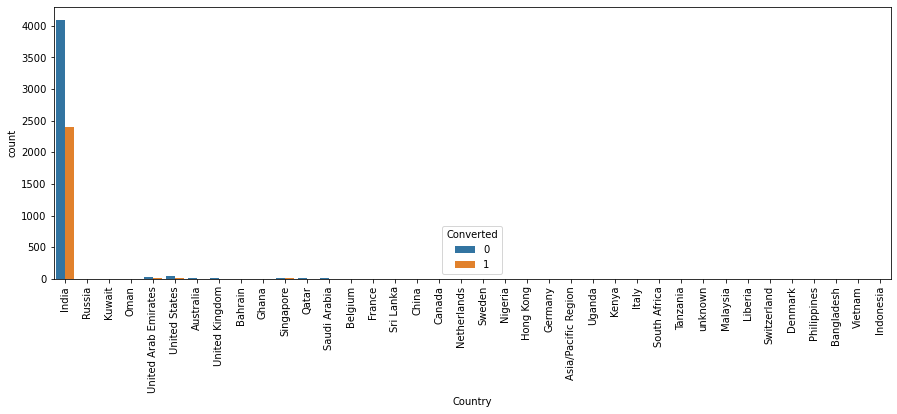

In [39]:
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Country', hue='Converted' , data =lead_df)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#India has more entrys ,and data is skewed so we will drop this column

In [40]:
#Checking Specialization
lead_df['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

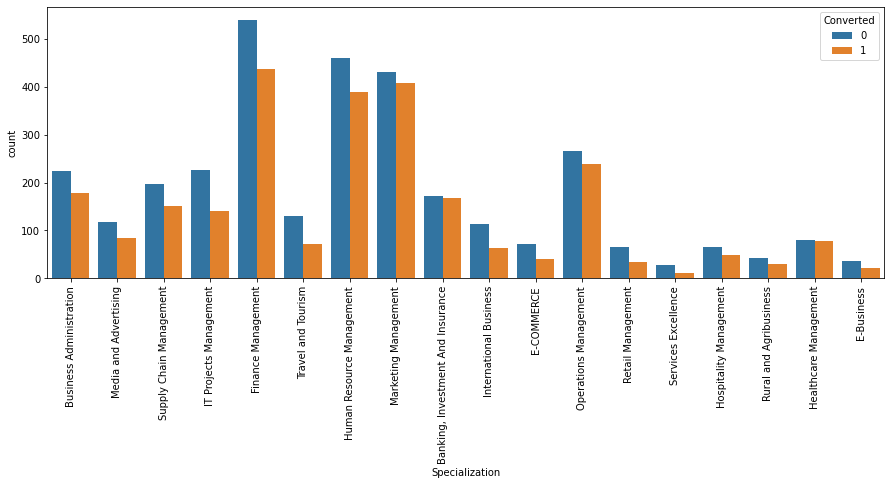

In [41]:
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Specialization', hue='Converted' , data =lead_df)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#Finance management ,Human resource Managament and Marketing Management has more leads but there are other speciliazation too like operation Management where lead and conversion is neraly equal

In [42]:
#Checking 'What is your current occupation'
lead_df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [43]:
#replace NAN values new category Other
lead_df['What is your current occupation']=lead_df['What is your current occupation'].replace(np.nan,'Other')

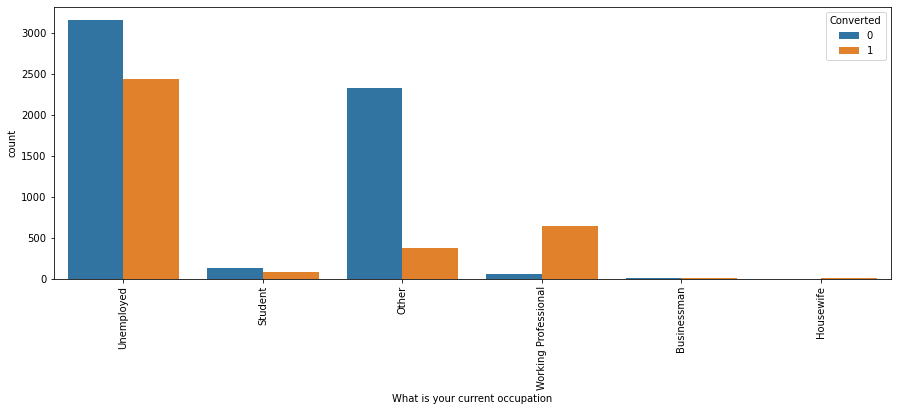

In [44]:
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'What is your current occupation', hue='Converted' , data =lead_df)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#Unemployed has more leads generated and working professional has higher conversion rates

In [45]:
#Checking What matters most to you in choosing this course
lead_df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [46]:
#Replacing Nan values with Better Career Prospects as higher frequency
lead_df['What matters most to you in choosing a course']=lead_df['What matters most to you in choosing a course'].replace(np.nan,'What matters most to you in choosing a course')

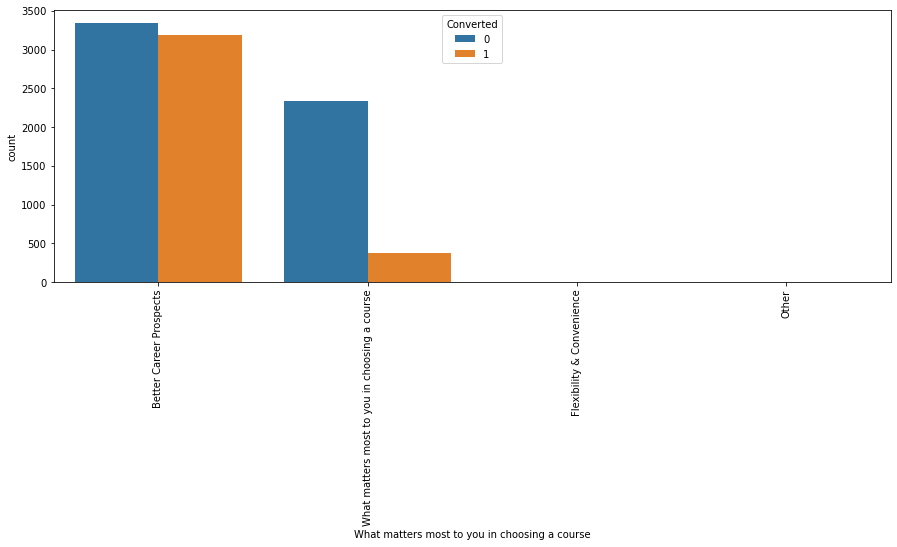

In [47]:
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'What matters most to you in choosing a course', hue='Converted' , data =lead_df)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#For better career prospects leads and conversion rates are higher

In [48]:
#Checking Search column
lead_df['Search'].value_counts(dropna=False)

No     9226
Yes      14
Name: Search, dtype: int64

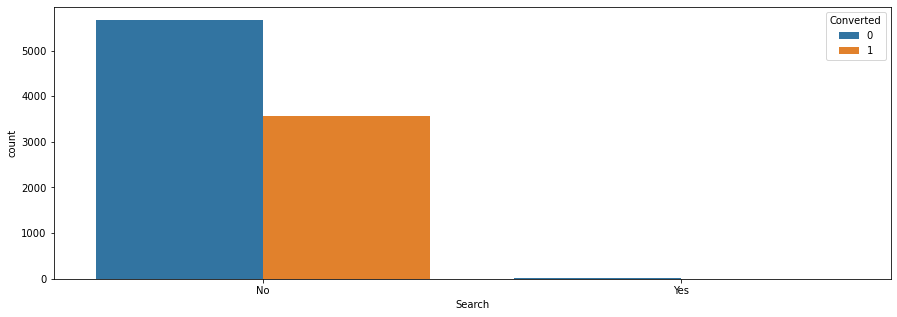

In [49]:
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Search', hue='Converted' , data =lead_df)
s1.set_xticklabels(s1.get_xticklabels())
plt.show()

#Data is not balanced so we drop this column

In [50]:
#Checking Magazine
lead_df['Magazine'].value_counts(dropna=False)

No    9240
Name: Magazine, dtype: int64

#by looking at data we can say that data is not balanced so we will drop the coumn


In [51]:
#Checking Newspaper Article
lead_df['Newspaper Article'].value_counts(dropna=False)

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

#by looking at data we can say that data is not balanced so we will drop the coumn


In [52]:
#Checking X Education Forums
lead_df['X Education Forums'].value_counts(dropna=False)

No     9239
Yes       1
Name: X Education Forums, dtype: int64

#by looking at data we can say that data is not balanced so we will drop the coumn

In [53]:
#Checking Newspaper
lead_df['Newspaper'].value_counts(dropna=False)

No     9239
Yes       1
Name: Newspaper, dtype: int64

#by looking at data we can say that data is not balanced so we will drop the coumn

In [54]:
#Checking Digital Advertisement
lead_df['Digital Advertisement'].value_counts(dropna=False)

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

#by looking at data we can say that data is not balanced so we will drop the coumn


In [55]:
#Checking Through Recommendations
lead_df['Through Recommendations'].value_counts(dropna=False)

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

#by looking at data we can say that data is not balanced so we will drop the coumn


In [56]:
#Checking Receive More Updates About Our Courses
lead_df['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

#by looking at data we can say that data is not balanced so we will drop the coumn


In [57]:
#Checking Tags
lead_df['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [58]:
lead_df['Tags']=lead_df['Tags'].replace(np.nan,'Others')

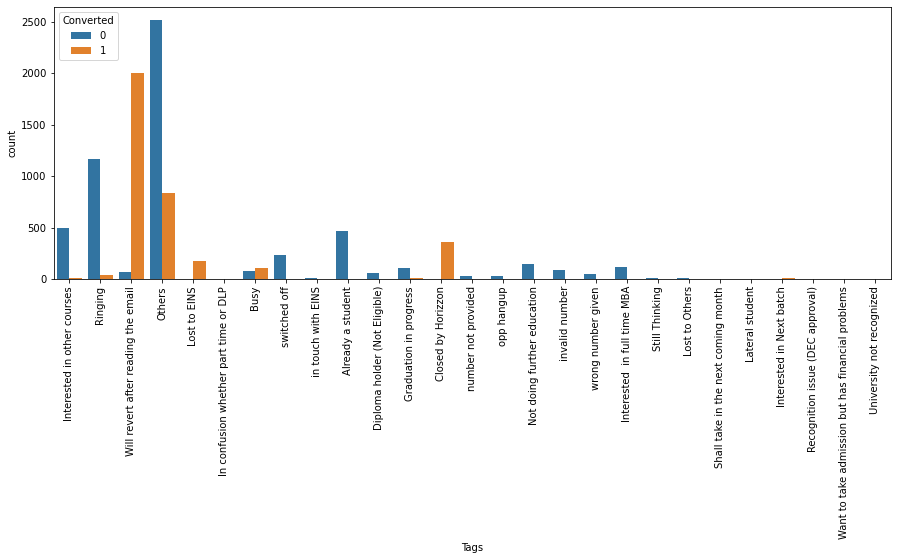

In [59]:
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Tags', hue='Converted' , data =lead_df)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#Other values and values with low frequency is nearly 50% so we will drop this column
#but Leads conversion is larger in will revert after reading the email

In [60]:
#Checking Update me on Supply Chain Content
lead_df['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9240
Name: Update me on Supply Chain Content, dtype: int64

#by looking at data we can say that data is not balanced so we will drop the coumn


In [61]:
#Checking Get updates on DM Content
lead_df['Get updates on DM Content'].value_counts(dropna=False)

No    9240
Name: Get updates on DM Content, dtype: int64

#by looking at data we can say that data is not balanced so we will drop the coumn

In [62]:
#Checking City
lead_df['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [63]:
lead_df['City']=lead_df['City'].replace(np.nan,'Others')

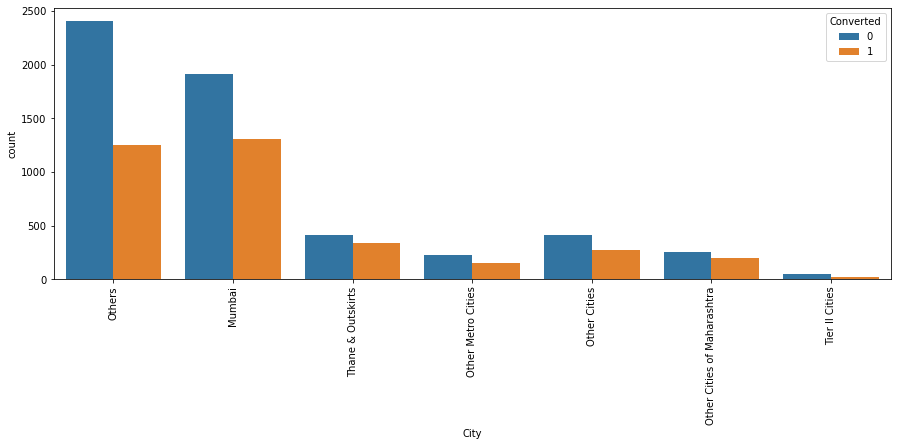

In [64]:
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'City', hue='Converted' , data =lead_df)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#Apart from other cities Mumbai has much leads.

In [65]:
#Checking I agree to pay the amount through cheque
lead_df['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

#by looking at data we can say that data is not balanced so we will drop the coumn

<AxesSubplot:xlabel='A free copy of Mastering The Interview', ylabel='count'>

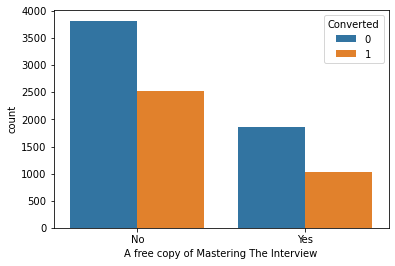

In [66]:
#Checking a free copy of Mastering The Interview
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = lead_df)

#a free copy of Mastering The Interview is not useful so we will frop this column

In [67]:
#Checking Last Notable Activity
lead_df['Last Notable Activity'].value_counts(dropna=False)

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [68]:

lead_df['Last Notable Activity'] = lead_df['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Others')

In [69]:
#Checking again Last Notable Activity
lead_df['Last Notable Activity'].value_counts(dropna=False)

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Others                      160
Name: Last Notable Activity, dtype: int64

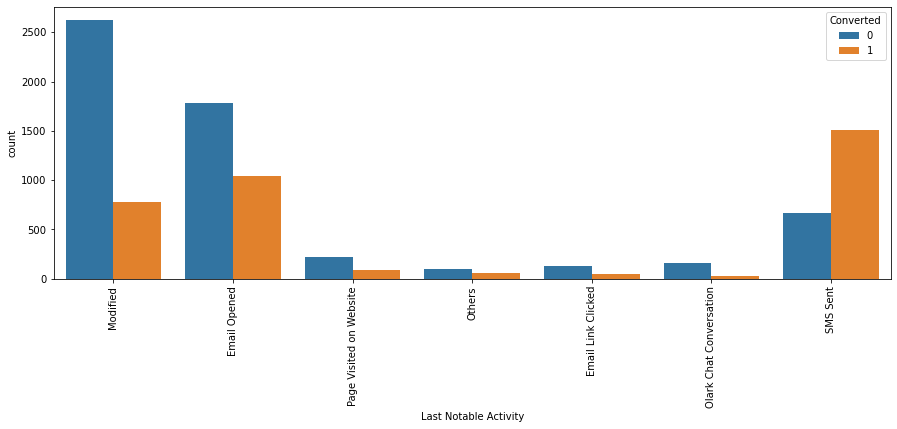

In [70]:
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Last Notable Activity', hue='Converted' , data =lead_df)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#Maximum leads are generated having last activity as Email opened but conversion rate is not too good.

In [71]:
#Checking Converted
lead_df['Converted'].value_counts(dropna=False)

0    5679
1    3561
Name: Converted, dtype: int64

<AxesSubplot:xlabel='Converted', ylabel='count'>

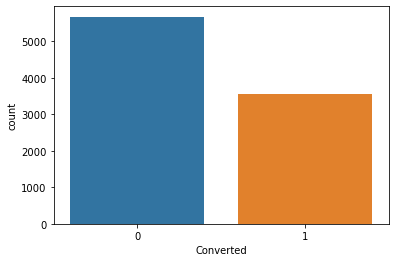

In [72]:
sns.countplot(lead_df['Converted'])

#As above graph shows conversion rate is less


In [73]:
lead_df.skew()

Converted                      0.471058
TotalVisits                    0.821377
Total Time Spent on Website    0.956450
Page Views Per Visit           0.431887
dtype: float64

In [74]:
lead_df.isnull().sum()

Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                       0
Country                                          2461
Specialization                                   3380
What is your current occupation                     0
What matters most to you in choosing a course       0
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

In [75]:
cols_drop=['Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
 'Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Tags','Specialization']

In [76]:
leads = lead_df.drop(cols_drop,1)

In [77]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9240 non-null   object 
 1   Lead Source                      9240 non-null   object 
 2   Do Not Email                     9240 non-null   object 
 3   Converted                        9240 non-null   int64  
 4   TotalVisits                      9103 non-null   float64
 5   Total Time Spent on Website      9240 non-null   int64  
 6   Page Views Per Visit             9103 non-null   float64
 7   Last Activity                    9240 non-null   object 
 8   What is your current occupation  9240 non-null   object 
 9   City                             9240 non-null   object 
 10  Last Notable Activity            9240 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 794.2+ KB


In [78]:
leads.isnull().sum()

Lead Origin                          0
Lead Source                          0
Do Not Email                         0
Converted                            0
TotalVisits                        137
Total Time Spent on Website          0
Page Views Per Visit               137
Last Activity                        0
What is your current occupation      0
City                                 0
Last Notable Activity                0
dtype: int64

In [79]:
leads = leads.dropna()

In [80]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9103 non-null   object 
 1   Lead Source                      9103 non-null   object 
 2   Do Not Email                     9103 non-null   object 
 3   Converted                        9103 non-null   int64  
 4   TotalVisits                      9103 non-null   float64
 5   Total Time Spent on Website      9103 non-null   int64  
 6   Page Views Per Visit             9103 non-null   float64
 7   Last Activity                    9103 non-null   object 
 8   What is your current occupation  9103 non-null   object 
 9   City                             9103 non-null   object 
 10  Last Notable Activity            9103 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 853.4+ KB


In [81]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,City,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,Others,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unemployed,Others,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Student,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Unemployed,Mumbai,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,Mumbai,Modified


In [82]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,City,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,Others,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unemployed,Others,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Student,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Unemployed,Mumbai,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,Mumbai,Modified


# Data Preparation

In [83]:
# List of variables to map

varlist =  ['Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

In [84]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,City,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,Others,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Unemployed,Others,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Student,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Unemployed,Mumbai,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,Mumbai,Modified


In [85]:
#Checking categorical columns
cat_cols= leads.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Last Activity',
       'What is your current occupation', 'City', 'Last Notable Activity'],
      dtype='object')

In [86]:
# creating dummy columns
dummies = pd.get_dummies(leads[cat_cols], drop_first=True)

# concat with original data set
leads = pd.concat([leads, dummies], axis = 1)

In [87]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,City,...,City_Other Metro Cities,City_Others,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,Others,...,0,1,0,0,0,1,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Unemployed,Others,...,0,1,0,0,1,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Student,Mumbai,...,0,0,0,0,1,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Unemployed,Mumbai,...,0,0,0,0,0,1,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,Mumbai,...,0,0,0,0,0,1,0,0,0,0


In [88]:
#dropping the original columns after dummy variable creation

leads.drop(cat_cols,1,inplace = True)

In [89]:
leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,City_Other Metro Cities,City_Others,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,2.0,1428,1.0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


# Splitting dataset in training and test data set with 70:30 Ratio

In [90]:
#Creating X variable
X=leads.drop(['Converted'],axis=1)

In [91]:
#Creating  y variable
y=leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [92]:
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,City_Other Metro Cities,City_Others,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,2.0,1428,1.0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [93]:
#importing library for splitting dataset
from sklearn.model_selection import train_test_split

In [94]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

In [95]:
#importing library for feature scaling
from sklearn.preprocessing import StandardScaler

In [96]:
# Scaling for continuous variables:

scaler = StandardScaler()
num_cols = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,City_Other Metro Cities,City_Others,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
3360,0,-0.068057,1.259711,0.414318,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
436,0,-0.068057,-0.805033,0.414318,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8236,0,1.008022,0.375081,0.414318,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3034,0,-0.785443,1.385566,-0.703902,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2776,0,-0.426750,-0.761257,-0.703902,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0


In [97]:
round(X_train.describe(),2)

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,City_Other Metro Cities,City_Others,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
count,6372.00,6372.00,6372.00,6372.00,6372.00,6372.00,6372.00,6372.00,6372.00,6372.00,...,6372.00,6372.00,6372.00,6372.00,6372.00,6372.00,6372.00,6372.00,6372.00,6372.00
mean,0.08,0.00,0.00,-0.00,0.54,0.07,0.00,0.00,0.32,0.19,...,0.04,0.39,0.08,0.01,0.31,0.36,0.02,0.02,0.03,0.24
std,0.27,1.00,1.00,1.00,0.50,0.25,0.06,0.06,0.47,0.39,...,0.20,0.49,0.27,0.09,0.46,0.48,0.14,0.13,0.18,0.43
min,0.00,-1.14,-0.89,-1.26,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,-0.79,-0.87,-0.70,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,-0.07,-0.44,-0.14,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.65,0.82,0.55,1.00,0.00,0.00,0.00,1.00,0.00,...,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00
max,1.00,2.44,3.26,2.09,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [98]:
#Importing liabrary for stasmodel and logistic regression
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [99]:
#creating LogisticRegression
logreg=LogisticRegression()
#Chossing 15 variables with help of RFE
rfe = RFE(estimator=logreg, n_features_to_select=20)
rfe=rfe.fit(X_train,y_train)

In [100]:
rfe.support_

array([ True, False,  True, False,  True,  True, False, False, False,
        True, False, False,  True, False,  True, False,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False,  True, False, False, False, False,
       False,  True, False,  True])

In [101]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 5),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 6),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 7),
 ('Lead Source_Facebook', False, 19),
 ('Lead Source_Google', False, 8),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 11),
 ('Lead Source_Others', False, 2),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 13),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 4),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 9),
 ('Last Activity_Olark Chat Conversation', False, 3),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Last Activity_SMS Sent', True, 1),
 ('What is your current occupation_Housewife',

In [102]:
#Creating column for varibales selected by RFE
col=X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'City_Others',
       'Last Notable Activity_Others', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [103]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [104]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
def get_vif(cols):
    vif = pd.DataFrame()
    vif['Features'] = X_train[cols].columns
    vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

# Model 1 

In [105]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6351
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2537.7
Date:                Mon, 23 Jan 2023   Deviance:                       5075.3
Time:                        16:51:44   Pearson chi2:                 6.25e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4135
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6866      1.239     -0.554      0.579      -3.114       1.741
Do Not Email                                            -1.5098      0.189     -7.969      0.000      -1.881      -1.138
Total Time Spent on Website                              1.0834      0.041     26.636      0.000       1.004       1.163
Lead Origin_Landing Page Submission                     -1.0373      0.134     -7.725      0.000      -1.300      -0.774
Lead Origin_Lead Add Form                                2.6265      0.581      4.517      0.000       1.487       3.766
Lead Source_Olark Chat                                   1.0922      0.123      8.912      0.000       0.852       1.332
Lead Source_Reference                                    0.6155      0.619      0.994      0.320      -0.599       1.830
Lead Source_Welingak Website                             3.2673      1.163      2.810      0.005       0.989       5.546
Last Activity_Email Link Clicked                         0.9083      0.243      3.739      0.000       0.432       1.384
Last Activity_Email Opened                               1.2930      0.125     10.340      0.000       1.048       1.538
Last Activity_Others                                     1.0047      0.308      3.257      0.001       0.400       1.609
Last Activity_Page Visited on Website                    0.9083      0.186      4.875      0.000       0.543       1.273
Last Activity_SMS Sent                                   1.7713      0.176     10.064      0.000       1.426       2.116
What is your current occupation_Housewife               22.0594   1.63e+04      0.001      0.999    -3.2e+04     3.2e+04
What is your current occupation_Other                   -1.8006      1.231     -1.463      0.144      -4.213       0.612
What is your current occupation_Student                 -0.5205      1.248     -0.417      0.677      -2.967       1.926
What is your current occupation_Unemployed              -0.6814      1.229     -0.554      0.579      -3.091       1.728
What is your current occupation_Working Professional     1.9751      1.244      1.587      0.112      -0.464       4.414
City_Others                                             -0.9144      0.130     -7.014      0.000      -1.170      -0.659
Last Notable Activity_Others                             2.0152      0.355      5.677      0.000       1.319       2.711
Last Notable Activity_SMS Sent                           0.9599      0.150      6.390      0.000       0.666       1.254
========================================================================================================================
"""

In [106]:
get_vif(col)

,Features,VIF
3,Lead Origin_Lead Add Form,16.73
5,Lead Source_Reference,13.24
15,What is your current occupation_Unemployed,11.84
2,Lead Origin_Landing Page Submission,8.08
11,Last Activity_SMS Sent,6.68
13,What is your current occupation_Other,6.49
17,City_Others,5.33
19,Last Notable Activity_SMS Sent,5.00
6,Lead Source_Welingak Website,4.16
8,Last Activity_Email Opened,3.34


#p-value of variable What is your current occupation_Housewife is high, so we can drop it.

In [107]:
col=col.drop('What is your current occupation_Housewife',1)

# Model2

In [108]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6352
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2539.3
Date:                Mon, 23 Jan 2023   Deviance:                       5078.6
Time:                        16:51:44   Pearson chi2:                 6.25e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4132
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6099      0.956      0.638      0.523      -1.263       2.483
Do Not Email                                            -1.5082      0.189     -7.961      0.000      -1.879      -1.137
Total Time Spent on Website                              1.0825      0.041     26.622      0.000       1.003       1.162
Lead Origin_Landing Page Submission                     -1.0366      0.134     -7.722      0.000      -1.300      -0.773
Lead Origin_Lead Add Form                                2.6270      0.581      4.518      0.000       1.487       3.767
Lead Source_Olark Chat                                   1.0932      0.123      8.919      0.000       0.853       1.333
Lead Source_Reference                                    0.6122      0.619      0.988      0.323      -0.602       1.826
Lead Source_Welingak Website                             3.2676      1.163      2.811      0.005       0.989       5.546
Last Activity_Email Link Clicked                         0.9125      0.243      3.759      0.000       0.437       1.388
Last Activity_Email Opened                               1.2976      0.125     10.374      0.000       1.052       1.543
Last Activity_Others                                     1.0063      0.309      3.261      0.001       0.402       1.611
Last Activity_Page Visited on Website                    0.9055      0.186      4.860      0.000       0.540       1.271
Last Activity_SMS Sent                                   1.7743      0.176     10.080      0.000       1.429       2.119
What is your current occupation_Other                   -3.0992      0.947     -3.271      0.001      -4.956      -1.242
What is your current occupation_Student                 -1.8197      0.970     -1.877      0.061      -3.720       0.081
What is your current occupation_Unemployed              -1.9805      0.945     -2.096      0.036      -3.832      -0.129
What is your current occupation_Working Professional     0.6759      0.964      0.701      0.483      -1.214       2.566
City_Others                                             -0.9170      0.130     -7.035      0.000      -1.172      -0.661
Last Notable Activity_Others                             2.0147      0.355      5.673      0.000       1.319       2.711
Last Notable Activity_SMS Sent                           0.9598      0.150      6.391      0.000       0.665       1.254
========================================================================================================================
"""

In [109]:
get_vif(col)

,Features,VIF
3,Lead Origin_Lead Add Form,16.73
5,Lead Source_Reference,13.24
14,What is your current occupation_Unemployed,11.71
2,Lead Origin_Landing Page Submission,8.03
11,Last Activity_SMS Sent,6.67
12,What is your current occupation_Other,6.44
16,City_Others,5.31
18,Last Notable Activity_SMS Sent,5.00
6,Lead Source_Welingak Website,4.16
8,Last Activity_Email Opened,3.32


#P Value of What is your current occupation_Working Professional is high so its need to be dropped


In [110]:
col=col.drop('What is your current occupation_Working Professional',1)

# Model 3

In [111]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6353
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2539.5
Date:                Mon, 23 Jan 2023   Deviance:                       5079.0
Time:                        16:51:45   Pearson chi2:                 6.24e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4131
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.2592      0.250      5.045      0.000       0.770       1.748
Do Not Email                                  -1.5073      0.189     -7.959      0.000      -1.879      -1.136
Total Time Spent on Website                    1.0827      0.041     26.623      0.000       1.003       1.162
Lead Origin_Landing Page Submission           -1.0367      0.134     -7.724      0.000      -1.300      -0.774
Lead Origin_Lead Add Form                      2.6274      0.581      4.519      0.000       1.488       3.767
Lead Source_Olark Chat                         1.0943      0.123      8.929      0.000       0.854       1.335
Lead Source_Reference                          0.6118      0.619      0.988      0.323      -0.602       1.826
Lead Source_Welingak Website                   3.2677      1.163      2.811      0.005       0.989       5.546
Last Activity_Email Link Clicked               0.9137      0.243      3.764      0.000       0.438       1.389
Last Activity_Email Opened                     1.2982      0.125     10.378      0.000       1.053       1.543
Last Activity_Others                           1.0069      0.309      3.264      0.001       0.402       1.612
Last Activity_Page Visited on Website          0.9038      0.186      4.850      0.000       0.539       1.269
Last Activity_SMS Sent                         1.7756      0.176     10.089      0.000       1.431       2.121
What is your current occupation_Other         -3.7492      0.212    -17.711      0.000      -4.164      -3.334
What is your current occupation_Student       -2.4696      0.296     -8.342      0.000      -3.050      -1.889
What is your current occupation_Unemployed    -2.6306      0.199    -13.189      0.000      -3.021      -2.240
City_Others                                   -0.9175      0.130     -7.040      0.000      -1.173      -0.662
Last Notable Activity_Others                   2.0154      0.355      5.675      0.000       1.319       2.711
Last Notable Activity_SMS Sent                 0.9598      0.150      6.392      0.000       0.666       1.254
==============================================================================================================
"""

In [112]:
get_vif(col)

,Features,VIF
3,Lead Origin_Lead Add Form,16.71
5,Lead Source_Reference,13.16
11,Last Activity_SMS Sent,6.39
14,What is your current occupation_Unemployed,5.65
2,Lead Origin_Landing Page Submission,5.33
17,Last Notable Activity_SMS Sent,4.99
6,Lead Source_Welingak Website,4.16
15,City_Others,3.79
12,What is your current occupation_Other,3.60
8,Last Activity_Email Opened,2.82


In [ ]:
#P value of Lead Source_Reference is high so we will drop this column

In [113]:
col=col.drop('Lead Source_Reference',1)

# Model 4

In [114]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6354
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2540.0
Date:                Mon, 23 Jan 2023   Deviance:                       5079.9
Time:                        16:51:46   Pearson chi2:                 6.24e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4131
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.2679      0.249      5.084      0.000       0.779       1.757
Do Not Email                                  -1.5153      0.190     -7.989      0.000      -1.887      -1.144
Total Time Spent on Website                    1.0825      0.041     26.616      0.000       1.003       1.162
Lead Origin_Landing Page Submission           -1.0413      0.134     -7.765      0.000      -1.304      -0.778
Lead Origin_Lead Add Form                      3.1656      0.234     13.513      0.000       2.706       3.625
Lead Source_Olark Chat                         1.0936      0.123      8.920      0.000       0.853       1.334
Lead Source_Welingak Website                   2.7312      1.035      2.640      0.008       0.703       4.759
Last Activity_Email Link Clicked               0.9151      0.242      3.774      0.000       0.440       1.390
Last Activity_Email Opened                     1.2972      0.125     10.372      0.000       1.052       1.542
Last Activity_Others                           1.0035      0.309      3.250      0.001       0.398       1.609
Last Activity_Page Visited on Website          0.9030      0.186      4.846      0.000       0.538       1.268
Last Activity_SMS Sent                         1.7759      0.176     10.094      0.000       1.431       2.121
What is your current occupation_Other         -3.7512      0.212    -17.727      0.000      -4.166      -3.336
What is your current occupation_Student       -2.4694      0.296     -8.349      0.000      -3.049      -1.890
What is your current occupation_Unemployed    -2.6329      0.199    -13.208      0.000      -3.024      -2.242
City_Others                                   -0.9236      0.130     -7.100      0.000      -1.179      -0.669
Last Notable Activity_Others                   2.0155      0.356      5.667      0.000       1.318       2.713
Last Notable Activity_SMS Sent                 0.9570      0.150      6.377      0.000       0.663       1.251
==============================================================================================================
"""

In [115]:
get_vif(col)

,Features,VIF
10,Last Activity_SMS Sent,6.38
13,What is your current occupation_Unemployed,5.64
2,Lead Origin_Landing Page Submission,5.33
16,Last Notable Activity_SMS Sent,4.99
14,City_Others,3.79
11,What is your current occupation_Other,3.60
7,Last Activity_Email Opened,2.82
4,Lead Source_Olark Chat,2.06
3,Lead Origin_Lead Add Form,1.62
15,Last Notable Activity_Others,1.60


#VIF factor is higher for Last Activity_SMS Sent so we will drop this column

In [116]:
col=col.drop('Last Activity_SMS Sent',1)

## Model 5

In [117]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6355
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2590.9
Date:                Mon, 23 Jan 2023   Deviance:                       5181.9
Time:                        16:51:46   Pearson chi2:                 6.49e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4036
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.8493      0.238      7.762      0.000       1.382       2.316
Do Not Email                                  -1.5592      0.188     -8.300      0.000      -1.927      -1.191
Total Time Spent on Website                    1.0815      0.040     26.801      0.000       1.002       1.161
Lead Origin_Landing Page Submission           -0.9941      0.133     -7.493      0.000      -1.254      -0.734
Lead Origin_Lead Add Form                      3.3569      0.236     14.211      0.000       2.894       3.820
Lead Source_Olark Chat                         1.0189      0.120      8.487      0.000       0.784       1.254
Lead Source_Welingak Website                   2.8169      1.040      2.709      0.007       0.778       4.855
Last Activity_Email Link Clicked               0.3066      0.231      1.327      0.184      -0.146       0.759
Last Activity_Email Opened                     0.6791      0.098      6.901      0.000       0.486       0.872
Last Activity_Others                           0.5358      0.294      1.823      0.068      -0.040       1.112
Last Activity_Page Visited on Website          0.2739      0.169      1.618      0.106      -0.058       0.606
What is your current occupation_Other         -3.6893      0.209    -17.677      0.000      -4.098      -3.280
What is your current occupation_Student       -2.5271      0.291     -8.685      0.000      -3.097      -1.957
What is your current occupation_Unemployed    -2.6158      0.197    -13.291      0.000      -3.002      -2.230
City_Others                                   -0.9369      0.129     -7.273      0.000      -1.189      -0.684
Last Notable Activity_Others                   1.7316      0.341      5.076      0.000       1.063       2.400
Last Notable Activity_SMS Sent                 2.1121      0.107     19.757      0.000       1.903       2.322
==============================================================================================================
"""

In [118]:
get_vif(col)

,Features,VIF
12,What is your current occupation_Unemployed,5.47
2,Lead Origin_Landing Page Submission,5.11
13,City_Others,3.74
10,What is your current occupation_Other,3.49
7,Last Activity_Email Opened,2.41
4,Lead Source_Olark Chat,2.06
15,Last Notable Activity_SMS Sent,2.01
14,Last Notable Activity_Others,1.60
3,Lead Origin_Lead Add Form,1.57
8,Last Activity_Others,1.55


#P value of Last Activity_Email Link Clicked is high so we will drop this column

In [119]:
col=col.drop('Last Activity_Email Link Clicked',1)

## Model 6

In [120]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2591.8
Date:                Mon, 23 Jan 2023   Deviance:                       5183.6
Time:                        16:51:47   Pearson chi2:                 6.47e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4034
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.8859      0.236      7.977      0.000       1.423       2.349
Do Not Email                                  -1.5697      0.187     -8.372      0.000      -1.937      -1.202
Total Time Spent on Website                    1.0809      0.040     26.793      0.000       1.002       1.160
Lead Origin_Landing Page Submission           -0.9916      0.133     -7.474      0.000      -1.252      -0.732
Lead Origin_Lead Add Form                      3.3623      0.236     14.244      0.000       2.900       3.825
Lead Source_Olark Chat                         1.0197      0.120      8.495      0.000       0.784       1.255
Lead Source_Welingak Website                   2.8149      1.040      2.708      0.007       0.777       4.852
Last Activity_Email Opened                     0.6424      0.094      6.835      0.000       0.458       0.827
Last Activity_Others                           0.5084      0.293      1.737      0.082      -0.065       1.082
Last Activity_Page Visited on Website          0.2378      0.167      1.425      0.154      -0.089       0.565
What is your current occupation_Other         -3.6925      0.209    -17.702      0.000      -4.101      -3.284
What is your current occupation_Student       -2.5247      0.291     -8.678      0.000      -3.095      -1.954
What is your current occupation_Unemployed    -2.6162      0.197    -13.301      0.000      -3.002      -2.231
City_Others                                   -0.9388      0.129     -7.287      0.000      -1.191      -0.686
Last Notable Activity_Others                   1.7194      0.340      5.051      0.000       1.052       2.387
Last Notable Activity_SMS Sent                 2.0759      0.103     20.169      0.000       1.874       2.278
==============================================================================================================
"""

In [121]:
get_vif(col)

,Features,VIF
11,What is your current occupation_Unemployed,5.41
2,Lead Origin_Landing Page Submission,5.04
12,City_Others,3.73
9,What is your current occupation_Other,3.47
6,Last Activity_Email Opened,2.28
4,Lead Source_Olark Chat,2.06
14,Last Notable Activity_SMS Sent,1.92
13,Last Notable Activity_Others,1.60
3,Lead Origin_Lead Add Form,1.56
7,Last Activity_Others,1.55


#P value of Last Activity_Page Visited on Website is high so we will drop this 

In [122]:
col=col.drop('Last Activity_Page Visited on Website',1)

## model 7

In [123]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2592.8
Date:                Mon, 23 Jan 2023   Deviance:                       5185.6
Time:                        16:51:47   Pearson chi2:                 6.47e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4032
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.9420      0.233      8.330      0.000       1.485       2.399
Do Not Email                                  -1.5675      0.188     -8.357      0.000      -1.935      -1.200
Total Time Spent on Website                    1.0816      0.040     26.794      0.000       1.002       1.161
Lead Origin_Landing Page Submission           -0.9912      0.133     -7.476      0.000      -1.251      -0.731
Lead Origin_Lead Add Form                      3.3575      0.236     14.240      0.000       2.895       3.820
Lead Source_Olark Chat                         1.0107      0.120      8.440      0.000       0.776       1.245
Lead Source_Welingak Website                   2.8072      1.039      2.702      0.007       0.771       4.844
Last Activity_Email Opened                     0.5931      0.087      6.824      0.000       0.423       0.763
Last Activity_Others                           0.4711      0.291      1.620      0.105      -0.099       1.041
What is your current occupation_Other         -3.6957      0.209    -17.707      0.000      -4.105      -3.287
What is your current occupation_Student       -2.5292      0.291     -8.696      0.000      -3.099      -1.959
What is your current occupation_Unemployed    -2.6191      0.197    -13.306      0.000      -3.005      -2.233
City_Others                                   -0.9467      0.129     -7.359      0.000      -1.199      -0.695
Last Notable Activity_Others                   1.6932      0.339      4.996      0.000       1.029       2.358
Last Notable Activity_SMS Sent                 2.0266      0.096     21.013      0.000       1.838       2.216
==============================================================================================================
"""

In [124]:
get_vif(col)

,Features,VIF
10,What is your current occupation_Unemployed,5.28
2,Lead Origin_Landing Page Submission,4.94
11,City_Others,3.71
8,What is your current occupation_Other,3.41
6,Last Activity_Email Opened,2.08
4,Lead Source_Olark Chat,2.06
13,Last Notable Activity_SMS Sent,1.78
12,Last Notable Activity_Others,1.60
3,Lead Origin_Lead Add Form,1.55
7,Last Activity_Others,1.54


#Last activity Others has high p value so we will drop it

In [125]:
col = col.drop('Last Activity_Others',1)

## model 8

In [126]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2594.1
Date:                Mon, 23 Jan 2023   Deviance:                       5188.1
Time:                        16:51:47   Pearson chi2:                 6.47e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4030
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.9575      0.233      8.409      0.000       1.501       2.414
Do Not Email                                  -1.5975      0.188     -8.512      0.000      -1.965      -1.230
Total Time Spent on Website                    1.0809      0.040     26.790      0.000       1.002       1.160
Lead Origin_Landing Page Submission           -0.9903      0.132     -7.475      0.000      -1.250      -0.731
Lead Origin_Lead Add Form                      3.3613      0.236     14.257      0.000       2.899       3.823
Lead Source_Olark Chat                         1.0045      0.120      8.399      0.000       0.770       1.239
Lead Source_Welingak Website                   2.7955      1.039      2.690      0.007       0.759       4.832
Last Activity_Email Opened                     0.5741      0.086      6.676      0.000       0.406       0.743
What is your current occupation_Other         -3.6902      0.209    -17.699      0.000      -4.099      -3.282
What is your current occupation_Student       -2.5292      0.291     -8.701      0.000      -3.099      -1.959
What is your current occupation_Unemployed    -2.6130      0.197    -13.289      0.000      -2.998      -2.228
City_Others                                   -0.9508      0.129     -7.398      0.000      -1.203      -0.699
Last Notable Activity_Others                   1.9891      0.280      7.096      0.000       1.440       2.539
Last Notable Activity_SMS Sent                 2.0092      0.096     20.984      0.000       1.822       2.197
==============================================================================================================
"""

In [127]:
get_vif(col)

,Features,VIF
9,What is your current occupation_Unemployed,5.25
2,Lead Origin_Landing Page Submission,4.93
10,City_Others,3.71
7,What is your current occupation_Other,3.41
6,Last Activity_Email Opened,2.06
4,Lead Source_Olark Chat,2.05
12,Last Notable Activity_SMS Sent,1.77
3,Lead Origin_Lead Add Form,1.55
1,Total Time Spent on Website,1.29
0,Do Not Email,1.27


#VIF value is higher of What is your current occupation_Unemployed so we will drop this column

In [128]:
col = col.drop('What is your current occupation_Unemployed',1)

## model 9

In [129]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6359
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2727.7
Date:                Mon, 23 Jan 2023   Deviance:                       5455.5
Time:                        16:51:48   Pearson chi2:                 6.56e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3774
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.4752      0.135     -3.528      0.000      -0.739      -0.211
Do Not Email                               -1.6752      0.184     -9.107      0.000      -2.036      -1.315
Total Time Spent on Website                 1.0858      0.039     27.586      0.000       1.009       1.163
Lead Origin_Landing Page Submission        -0.9611      0.128     -7.495      0.000      -1.212      -0.710
Lead Origin_Lead Add Form                   3.7027      0.229     16.144      0.000       3.253       4.152
Lead Source_Olark Chat                      0.9847      0.117      8.437      0.000       0.756       1.213
Lead Source_Welingak Website                2.3053      1.038      2.220      0.026       0.270       4.340
Last Activity_Email Opened                  0.5710      0.083      6.853      0.000       0.408       0.734
What is your current occupation_Other      -1.2577      0.088    -14.332      0.000      -1.430      -1.086
What is your current occupation_Student    -0.1123      0.223     -0.503      0.615      -0.550       0.325
City_Others                                -0.9570      0.125     -7.638      0.000      -1.203      -0.711
Last Notable Activity_Others                2.0171      0.276      7.297      0.000       1.475       2.559
Last Notable Activity_SMS Sent              1.9972      0.093     21.487      0.000       1.815       2.179
===========================================================================================================
"""

In [130]:
get_vif(col)

,Features,VIF
9,City_Others,2.45
2,Lead Origin_Landing Page Submission,2.44
4,Lead Source_Olark Chat,1.95
6,Last Activity_Email Opened,1.91
11,Last Notable Activity_SMS Sent,1.74
7,What is your current occupation_Other,1.60
3,Lead Origin_Lead Add Form,1.53
1,Total Time Spent on Website,1.28
0,Do Not Email,1.26
5,Lead Source_Welingak Website,1.25


In [131]:
col = col.drop('What is your current occupation_Student',1)

## model 10

In [132]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6360
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2727.9
Date:                Mon, 23 Jan 2023   Deviance:                       5455.8
Time:                        16:51:48   Pearson chi2:                 6.56e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3774
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.4779      0.135     -3.550      0.000      -0.742      -0.214
Do Not Email                             -1.6753      0.184     -9.110      0.000      -2.036      -1.315
Total Time Spent on Website               1.0857      0.039     27.585      0.000       1.009       1.163
Lead Origin_Landing Page Submission      -0.9625      0.128     -7.506      0.000      -1.214      -0.711
Lead Origin_Lead Add Form                 3.7019      0.229     16.138      0.000       3.252       4.152
Lead Source_Olark Chat                    0.9820      0.117      8.424      0.000       0.754       1.210
Lead Source_Welingak Website              2.3079      1.038      2.223      0.026       0.273       4.343
Last Activity_Email Opened                0.5710      0.083      6.853      0.000       0.408       0.734
What is your current occupation_Other    -1.2540      0.087    -14.339      0.000      -1.425      -1.083
City_Others                              -0.9572      0.125     -7.639      0.000      -1.203      -0.712
Last Notable Activity_Others              2.0198      0.276      7.310      0.000       1.478       2.561
Last Notable Activity_SMS Sent            1.9995      0.093     21.537      0.000       1.818       2.182
=========================================================================================================
"""

In [133]:
get_vif(col)

,Features,VIF
8,City_Others,2.44
2,Lead Origin_Landing Page Submission,2.41
4,Lead Source_Olark Chat,1.94
6,Last Activity_Email Opened,1.91
10,Last Notable Activity_SMS Sent,1.73
7,What is your current occupation_Other,1.59
3,Lead Origin_Lead Add Form,1.53
1,Total Time Spent on Website,1.28
0,Do Not Email,1.26
5,Lead Source_Welingak Website,1.25


#p value and VIF looks fine so we can proceed to make prediction

In [134]:
#getting pred value for train set
y_train_pred=res.predict(X_train_sm)
y_train_pred[:10]

3360    0.662139
436     0.089942
8236    0.092195
3034    0.977493
2776    0.094359
2420    0.474092
6304    0.157356
1421    0.181301
308     0.468374
7230    0.208586
dtype: float64

In [135]:
y_train_pred=y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.66213934, 0.08994179, 0.09219455, 0.97749253, 0.09435924,
       0.47409151, 0.15735579, 0.18130062, 0.46837447, 0.208586  ])

In [136]:
y_train_pred_final=pd.DataFrame({'converted':y_train.values,'converted_prob':y_train_pred})
y_train_pred_final['Lead Number']=y_train.index
y_train_pred_final.head()

,converted,converted_prob,Lead Number
0,1,0.662139,3360
1,0,0.089942,436
2,0,0.092195,8236
3,1,0.977493,3034
4,0,0.094359,2776


#we have created new table 'converted_prob' and considered 0.5 as arbitrary value to select converted or non-converted if this value is less than 0.5 then it means not converted and if it is above 0.5 then it means converted

In [137]:
y_train_pred_final['Predicted']=y_train_pred_final.converted_prob.map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

,converted,converted_prob,Lead Number,Predicted
0,1,0.662139,3360,1
1,0,0.089942,436,0
2,0,0.092195,8236,0
3,1,0.977493,3034,1
4,0,0.094359,2776,0


In [138]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.Predicted )
print(confusion)

[[3412  526]
 [ 730 1704]]


In [139]:
print(metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.Predicted ))

0.802887633396108


# ROC curve

In [140]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

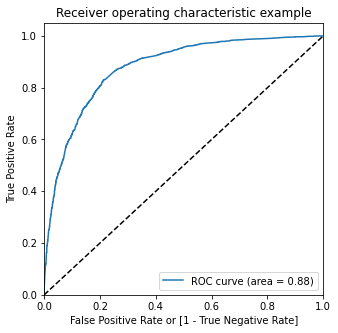

In [141]:
draw_roc(y_train_pred_final.converted, y_train_pred_final.converted_prob)

In [142]:
#Probability cutoff
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,converted,converted_prob,Lead Number,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.662139,3360,1,1,1,1,1,1,1,1,0,0,0
1,0,0.089942,436,0,1,0,0,0,0,0,0,0,0,0
2,0,0.092195,8236,0,1,0,0,0,0,0,0,0,0,0
3,1,0.977493,3034,1,1,1,1,1,1,1,1,1,1,1
4,0,0.094359,2776,0,1,0,0,0,0,0,0,0,0,0


In [143]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381984  1.000000  0.000000
0.1   0.1  0.600126  0.979047  0.365922
0.2   0.2  0.752040  0.912901  0.652616
0.3   0.3  0.793942  0.860312  0.752920
0.4   0.4  0.803986  0.778965  0.819451
0.5   0.5  0.802888  0.700082  0.866430
0.6   0.6  0.791588  0.598192  0.911122
0.7   0.7  0.768048  0.480690  0.945658
0.8   0.8  0.740584  0.374281  0.966988
0.9   0.9  0.696485  0.228841  0.985526


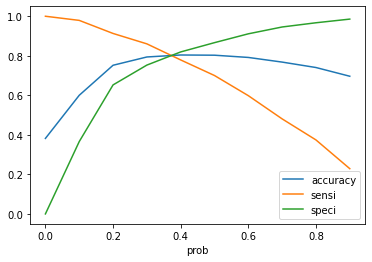

In [144]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#Cut off value 0.3 in above graph

In [145]:
# From cut off point 0.38
y_train_pred_final['final_predicted'] = y_train_pred_final.converted_prob.map( lambda x: 1 if x > 0.38 else 0)

y_train_pred_final.head()

,converted,converted_prob,Lead Number,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.662139,3360,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.089942,436,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.092195,8236,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.977493,3034,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.094359,2776,0,1,0,0,0,0,0,0,0,0,0,0


In [146]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.final_predicted)

0.8039861895794099

In [147]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.final_predicted )
confusion2

array([[3198,  740],
       [ 509, 1925]], dtype=int64)

In [148]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['converted','converted_prob','Lead Number','final_predicted','Lead_Score']].head()

,converted,converted_prob,Lead Number,final_predicted,Lead_Score
0,1,0.662139,3360,1,66
1,0,0.089942,436,0,9
2,0,0.092195,8236,0,9
3,1,0.977493,3034,1,98
4,0,0.094359,2776,0,9


In [149]:
checking_df = y_train_pred_final.loc[y_train_pred_final['converted']==1,['converted','final_predicted']]
checking_df['final_predicted'].value_counts()

1    1925
0     509
Name: final_predicted, dtype: int64

In [150]:
2025/float(2025+394)

0.8371227780074411

In [151]:
#Importing liabrary from sklearn for precision and recall
from sklearn.metrics import precision_score, recall_score

In [152]:
#Precision Score
precision_score(y_train_pred_final.converted , y_train_pred_final.final_predicted)

0.7223264540337712

In [153]:
#Recall Score
recall_score(y_train_pred_final.converted, y_train_pred_final.final_predicted)

0.7908792111750206

In [154]:
# importing precision recall curve from sklearn library
from sklearn.metrics import precision_recall_curve

In [155]:
# Creating precision recall curve
y_train_pred_final.converted, y_train_pred_final.final_predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.converted, y_train_pred_final.converted_prob)

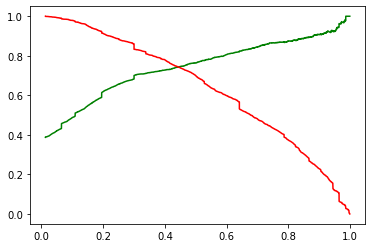

In [156]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [157]:
#Making predictions on the test set
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_test.head(10)

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,City_Other Metro Cities,City_Others,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
7999,0,-0.785443,-0.502252,-0.703902,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4317,0,-0.068057,-0.655466,0.414318,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5468,0,-1.144136,-0.888936,-1.263012,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
2220,0,-0.426750,-0.073617,-0.144792,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3766,0,0.290636,-0.701066,0.973428,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3595,0,-1.144136,-0.888936,-1.263012,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
4112,0,-1.144136,-0.888936,-1.263012,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
1455,0,0.290636,1.051777,0.973428,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
7064,0,1.366715,1.385566,2.091648,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
5657,0,0.290636,0.759941,0.973428,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [158]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Opened,What is your current occupation_Other,City_Others,Last Notable Activity_Others,Last Notable Activity_SMS Sent
7999,0,-0.502252,1,0,0,0,0,0,0,0,0
4317,0,-0.655466,1,0,0,0,1,0,0,0,0
5468,0,-0.888936,0,0,1,0,0,1,1,0,0
2220,0,-0.073617,1,0,0,0,1,0,0,0,0
3766,0,-0.701066,1,0,0,0,1,1,0,0,0


In [159]:
#Adding constant
X_test_sm = sm.add_constant(X_test)

In [160]:
#Making Predicition on test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

7999    0.120721
4317    0.170654
5468    0.064636
2220    0.279026
3766    0.052924
3595    0.194951
4112    0.641387
1455    0.567712
7064    0.585005
5657    0.488922
dtype: float64

In [161]:
# Converting y_pred to a dataframe
y_pred_df = pd.DataFrame(y_test_pred)

In [162]:
# Let's see the head
y_pred_df.head()

,0
7999,0.120721
4317,0.170654
5468,0.064636
2220,0.279026
3766,0.052924


In [164]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting CustID to index
y_test_df['Lead ID'] = y_test_df.index

In [165]:
# Removing index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [166]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
y_pred_final.head()

,Converted,Lead ID,0
0,0,7999,0.120721
1,1,4317,0.170654
2,0,5468,0.064636
3,0,2220,0.279026
4,0,3766,0.052924


In [167]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [169]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Lead ID,Converted_prob
0,0,7999,0.120721
1,1,4317,0.170654
2,0,5468,0.064636
3,0,2220,0.279026
4,0,3766,0.052924


In [170]:
# Creating new column "Lead Score" 
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Converted,Lead ID,Converted_prob,Lead_Score
0,0,7999,0.120721,12
1,1,4317,0.170654,17
2,0,5468,0.064636,6
3,0,2220,0.279026,28
4,0,3766,0.052924,5


In [172]:
# Creating predicted column with 0.38 probability cutoff
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.38 else 0)

In [173]:
y_pred_final.head()

,Converted,Lead ID,Converted_prob,Lead_Score,final_predicted
0,0,7999,0.120721,12,0
1,1,4317,0.170654,17,0
2,0,5468,0.064636,6,0
3,0,2220,0.279026,28,0
4,0,3766,0.052924,5,0


In [174]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.809959721713658

In [175]:
confusion2 = confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1400,  304],
       [ 215,  812]], dtype=int64)

In [176]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [177]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity of the model on test data is:",TP / float(TP+FN))

Sensitivity of the model on test data is: 0.7906523855890945


In [178]:
# Let us calculate specificity
print("Specificity of the model on test data is:",TN / float(TN+FP))

Specificity of the model on test data is: 0.8215962441314554
